# Testing Covariance Ellipsoid Plottting

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from covariance_ellipsoid import *

### Test on 2D data

In [27]:
# Generate test data points
num_points = 334
bias = np.asarray([10.,10.]) # change this to add bias to data
s = np.asarray([2,2]).reshape([2,1]) # change values of s to modify data spread
x = np.random.randn(num_points)
data = np.random.standard_normal([2,num_points])+s*x.reshape([1,-1]) + bias.reshape([-1,1])

In [28]:
# compute mean and covariance of data
mean, cov = get_mean_and_covariance_matrix(data)

(3.140614515050207, 16.6841252106573, 3.35984939488154, 16.77314926135681)

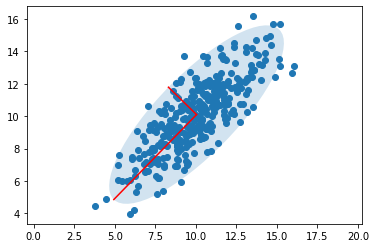

In [30]:
# plot covariance ellipse around mean with specified confidence level
confidence = 0.95 # choose confidence level for ellipse
ax=plot_covariance_ellipsoid(mean, cov, confidence=confidence, datapoints=data)
plt.axis("equal")

(3.140614515050207, 16.6841252106573, 3.35984939488154, 16.77314926135681)

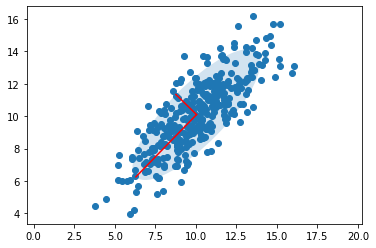

In [31]:
# plot covariance ellipse around mean with different confidence level
confidence = 0.8 # choose confidence level for ellipse
ax=plot_covariance_ellipsoid(mean, cov, confidence=confidence, datapoints=data)
plt.axis("equal")

### Test on 3D data

In [32]:
# Generate 3D data points
num_points = 334
bias = np.asarray([10.,10.,10.]) # change this to add bias to data
s = np.asarray([2,2,2]).reshape([3,1]) # change values of s to modify data spread
x = np.random.randn(num_points)
data = np.random.standard_normal([3,num_points])+s*x.reshape([1,-1]) + bias.reshape([-1,1])

In [33]:
# compute mean and covariance of data
mean, cov = get_mean_and_covariance_matrix(data)

(3.4076935255701146, 17.93990689998912, 3.193494221036802, 16.811602574925463)

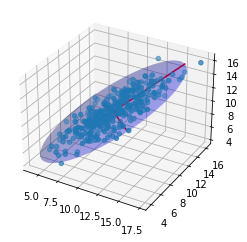

In [35]:
# plot covariance ellipsoid around mean with specified confidence level
confidence = 0.95 # choose confidence level for ellipse
ax=plot_covariance_ellipsoid(mean, cov, confidence=confidence, datapoints=data)
plt.axis("auto")